In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

In [2]:
def ArgparseEFFile(path,method = None):
    data = pd.read_excel(path)
    data.columns = ['TARGET', 'AUROC', 'BEDROC', f'0.5%EF', f'1.0%EF', f'5.0%EF']
    data['TARGET'] = data['TARGET'].apply(lambda x : str(x).lower())
    if method is None:
        data['Method'] = [path.split('_')[-1].split('.')[0]]*len(data)
    else:
        data['Method'] = [method]*len(data)
    return data

def GetTargetInfo(path):
    data_informations = pd.read_excel(path)
    data_family = data_informations.loc[:,['Target Name','Classification']]
    data_family.columns = ['TARGET','family']
    data_family['TARGET'] = data_family['TARGET'].apply(lambda x : x.lower())
    return data_family
def GetPandasDataEF(data,):
    # print(data.columns)
    name = []
    efs = []
    method = []
    for col in data.columns:
        if 'EF' in col:
            name.extend([col]*len(data))
            efs.extend(data[col].values)

            method.extend(data['Method'].values)
    efs_df = pd.DataFrame({'name':name,
                        'efs':efs,
                        'method':method})
    return efs_df
def GetPandasDataROC(data):
    name = []
    efs = []
    method = []
    for col in data.columns:
        if 'ROC' in col:
            name.extend([col]*len(data))
            efs.extend(data[col].values)

            method.extend(data['Method'].values)
    efs_df = pd.DataFrame({'name':name,
                        'efs':efs,
                        'method':method})
    efs_df = efs_df.fillna(0.0)
    return efs_df

In [4]:
data_list = [
    'dekois_AutoDock Vina.xlsx',
    'dekois2_VINA_EquiScore.xlsx',
    'dekois_GOLD.xlsx',
    'dekois2_GOLD_EquiScore.xlsx',
    'dekois_Surflex-Dock.xlsx',
    'dekois2_SURFLEX_EquiScore.xlsx',
    'dekois_LeDock.xlsx',
    'dekois2_LEDOCK_EquiScore.xlsx',
    'dekois_GLIDE SP.xlsx',
    'dekois2_SP_EquiScore.xlsx', 
]

datas = []
methods = ['AutoDock Vina','AutoDock Vina + EquiScore','GOLD','GOLD + EquiScore','Surflex-Dock','Surflex-Dock + EquiScore',\
    'LeDock','LeDock + EquiScore','GLIDE SP','GLIDE SP + EquiScore',]
for data_path ,method in zip(data_list,methods):
    data_raw = ArgparseEFFile(data_path,method)
    # data_raw['dock_method'] = method.split(' +')[0]
    # print(data_raw.columns)

    datas.append(data_raw)
datas = pd.concat(datas,axis = 0)
efs_df =  GetPandasDataEF(datas)
# efs_df = efs_df.fillna(0.0)
efs_df['dock_method'] = efs_df['method'].apply(lambda x: x if '+' not in x else x.split(' +')[0])
efs_df['With EquiScore'] = efs_df['method'].apply(lambda x: 'NO' if '+' not in x else 'YES')

In [5]:
color_styles = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
# for color in color_styles:
import random
random.seed(42)
np.random.seed(42)
current_palette = sns.color_palette('pastel')

current_palette[0] = current_palette[5]
current_palette[1] = current_palette[4]

In [13]:
efs_df

,name,efs,method,dock_method,With EquiScore
0,0.5%EF,0.000,AutoDock Vina,AutoDock Vina,NO
1,0.5%EF,0.000,AutoDock Vina,AutoDock Vina,NO
2,0.5%EF,0.000,AutoDock Vina,AutoDock Vina,NO
3,0.5%EF,0.000,AutoDock Vina,AutoDock Vina,NO
4,0.5%EF,0.000,AutoDock Vina,AutoDock Vina,NO
...,...,...,...,...,...
2425,5.0%EF,8.121,GLIDE SP + EquiScore,GLIDE SP,YES
2426,5.0%EF,2.540,GLIDE SP + EquiScore,GLIDE SP,YES
2427,5.0%EF,9.313,GLIDE SP + EquiScore,GLIDE SP,YES
2428,5.0%EF,4.110,GLIDE SP + EquiScore,GLIDE SP,YES


In [6]:
current_palette

[(0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [12]:
sns.set_theme(style="ticks", palette=current_palette)
figure = plt.figure(figsize = (12,8))

# color = efs_df_single_family[''].apply(lambda x:current_palette[int(x)])
# print(len(set(color)))
fig = sns.boxplot(x="dock_method", y="efs",hue='With EquiScore',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            data=efs_df[efs_df['name'] == f'1.0%EF'])
# fig.legend(ncol=3,loc='upper right',fontsize=16)
# figure.add_subplot(241)
plt.ylabel("Enrichment Factor(0.5%)",fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlabel('Method',fontsize = 20,labelpad=12)
plt.xticks(fontsize = 16)
# plt.savefig(f'/home/caoduanhua/score_function/data/EF_analysis_EVERY_TARGET/figures/dekois2_EquiScore_compare_raw_05%EF.png',dpi=660,format='png')

ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

In [8]:

efs_df_ROC =  GetPandasDataROC(datas)
efs_df_ROC['dock_method'] = efs_df_ROC['method'].apply(lambda x: x if '+' not in x else x.split(' +')[0])
efs_df_ROC['With EquiScore'] = efs_df_ROC['method'].apply(lambda x: 'NO' if '+' not in x else 'YES')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AutoDock Vina'),
  Text(1, 0, 'GOLD'),
  Text(2, 0, 'Surflex-Dock'),
  Text(3, 0, 'LeDock'),
  Text(4, 0, 'GLIDE SP')])

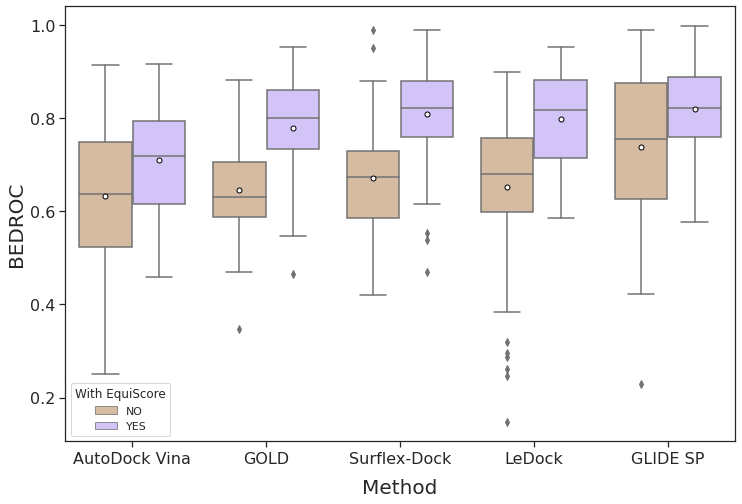

In [15]:
sns.set_theme(style="ticks", palette=current_palette)
figure = plt.figure(figsize = (12,8))

fig = sns.boxplot(x="dock_method", y="efs",hue='With EquiScore',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            data=efs_df_ROC[efs_df_ROC['name'] == f'AUROC'])

plt.ylabel("BEDROC",fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlabel('Method',fontsize = 20,labelpad=12)
plt.xticks(fontsize = 16)